In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Generate random latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# When this cell is executed, the output is a zip object in memory
# The zip object packs each pair of lats and longs having the same index in their respective array
# into a tuple

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Import citipy module
from citipy import citipy

In [5]:
# Create a list for holding the cities
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

642

In [6]:
# Map out how to get weather data for each city for the website
# 1. Import dependencies and initialize counters and an empty list that will hold the weather data
# 2. Loop through the cities list
# 3. Group the cities in set of 50 to log the process as weather data is found for each city
    # Two counters will be needed: one to log the city count from 1 to 50 and another for the sets
# 4. Build the city_url or endpoint for each city
# 5. Log the URL and the record and set numbers
# 6. Make an API request for each city
# 7. Parse the JSON weather data for the following:
    # City, country, and date
    # Latitude and longitude
    # Maximum temperature
    # Humidity
    # Cloudiness
    # Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame

In [7]:
# Import the requests library
import requests

# Import the API key
from config import weather_api_key

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d58cec1399a9bffb48701a67c798162c


In [9]:
# Import the datetime module from the datetime library
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data
city_data = []

# Print the beginning of the logging
print("Beginning of data retrieval          ")
print("-------------------------------------")

# Create the counters and initialize to 1 because the first iteration of logging for each recorded response and
# the set needs to start at 1
record_count = 1
set_count = 1


# Every time a city is referenced in the code, the index on the cities list needs to be used
# This will cause programming errors when building city_url because it adds to the index, not the city name to
# city_url
# To fix this issue, another for loop needs to be created in order to the city from the cities list
# Instead of using two for loops, use the enumerate() method as an alternative way to iterate through the list 
# of cities and retrieve both the index and city from the list

# Loop through the cities in the list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count
    record_count += 1
    
# Add a try-except block to prevent API requests from stopping prematurelyy if the city_weather requests is 
# not a valuid request
# If the request isn't valid, the code ill not find the first item requested, which is the dictionary "coord"
# The code will skip the city and continue to run

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information to the city_data list
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
# If an error is given, skip the city
    except:
        print("City not found.  Skipping...")
        pass
    
# Indicate the date loading is complete
print("------------------------------")
print("Date retrieval complete       ")
print("------------------------------")

Beginning of data retrieval          
-------------------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | barrow
Processing Record 3 of Set 1 | adrar
Processing Record 4 of Set 1 | hofn
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | japura
Processing Record 9 of Set 1 | ponta do sol
Processing Record 10 of Set 1 | atar
Processing Record 11 of Set 1 | taolanaro
City not found.  Skipping...
Processing Record 12 of Set 1 | port-gentil
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | nizhneyansk
City not found.  Skipping...
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | evensk
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | alice springs
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | klaksvik
Processing R

Processing Record 36 of Set 4 | berlevag
Processing Record 37 of Set 4 | saint-philippe
Processing Record 38 of Set 4 | hamilton
Processing Record 39 of Set 4 | port elizabeth
Processing Record 40 of Set 4 | wuhu
Processing Record 41 of Set 4 | tuatapere
Processing Record 42 of Set 4 | cidreira
Processing Record 43 of Set 4 | bredasdorp
Processing Record 44 of Set 4 | launceston
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | cumpas
Processing Record 48 of Set 4 | shimoda
Processing Record 49 of Set 4 | miandrivazo
Processing Record 50 of Set 4 | yongan
Processing Record 1 of Set 5 | vao
Processing Record 2 of Set 5 | brae
Processing Record 3 of Set 5 | anloga
Processing Record 4 of Set 5 | bilibino
Processing Record 5 of Set 5 | nanortalik
Processing Record 6 of Set 5 | cururupu
Processing Record 7 of Set 5 | mastic beach
Processing Record 8 of Set 5 | olafsvik
Processing Record 9 of Set 5 | qui nhon
Processing Record 10 o

City not found.  Skipping...
Processing Record 29 of Set 8 | salalah
Processing Record 30 of Set 8 | meulaboh
Processing Record 31 of Set 8 | jatai
Processing Record 32 of Set 8 | mantua
Processing Record 33 of Set 8 | dolbeau
City not found.  Skipping...
Processing Record 34 of Set 8 | lurgan
Processing Record 35 of Set 8 | meyungs
City not found.  Skipping...
Processing Record 36 of Set 8 | ukiah
Processing Record 37 of Set 8 | engels
Processing Record 38 of Set 8 | rock springs
Processing Record 39 of Set 8 | makow mazowiecki
Processing Record 40 of Set 8 | tateyama
Processing Record 41 of Set 8 | tondano
Processing Record 42 of Set 8 | padang
Processing Record 43 of Set 8 | bafra
Processing Record 44 of Set 8 | goderich
Processing Record 45 of Set 8 | dingle
Processing Record 46 of Set 8 | pacific grove
Processing Record 47 of Set 8 | komatipoort
Processing Record 48 of Set 8 | attawapiskat
City not found.  Skipping...
Processing Record 49 of Set 8 | sungai siput utara
City not fou

Processing Record 17 of Set 12 | brownsville
Processing Record 18 of Set 12 | champerico
Processing Record 19 of Set 12 | yafran
Processing Record 20 of Set 12 | sitka
Processing Record 21 of Set 12 | abu dhabi
Processing Record 22 of Set 12 | touros
Processing Record 23 of Set 12 | bereda
Processing Record 24 of Set 12 | general pico
Processing Record 25 of Set 12 | bayana
Processing Record 26 of Set 12 | silver city
Processing Record 27 of Set 12 | siocon
Processing Record 28 of Set 12 | hoquiam
Processing Record 29 of Set 12 | beloha
Processing Record 30 of Set 12 | camacha
Processing Record 31 of Set 12 | vaitape
Processing Record 32 of Set 12 | khuzdar
Processing Record 33 of Set 12 | henties bay
Processing Record 34 of Set 12 | mogadishu
Processing Record 35 of Set 12 | pochutla
Processing Record 36 of Set 12 | jand
Processing Record 37 of Set 12 | avera
Processing Record 38 of Set 12 | plastun
Processing Record 39 of Set 12 | turayf
Processing Record 40 of Set 12 | comodoro riva

In [11]:
# Print the city count to confirm sufficient count.
len(cities)

642

In [12]:
# Convert the array of dictionaries to a DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,44.60,70,75,9.22,AR,2021-01-11 20:04:35
1,Barrow,71.2906,-156.7887,1.40,71,90,23.02,US,2021-01-11 20:06:37
2,Adrar,20.5022,-10.0711,60.66,32,100,11.32,MR,2021-01-11 20:06:37
3,Hofn,64.2539,-15.2082,24.80,58,0,4.61,IS,2021-01-11 20:06:37
4,Airai,-8.9266,125.4092,61.68,100,38,0.83,TL,2021-01-11 20:06:37
5,Punta Arenas,-53.1500,-70.9167,50.00,62,75,26.46,CL,2021-01-11 20:06:37
6,Yellowknife,62.4560,-114.3525,12.99,92,40,8.05,CA,2021-01-11 20:06:37
7,Japura,-0.3167,102.3500,72.93,98,100,2.82,ID,2021-01-11 20:06:38
8,Ponta Do Sol,32.6667,-17.1000,55.00,63,21,3.00,PT,2021-01-11 20:06:38
9,Atar,20.5169,-13.0499,62.51,37,100,11.50,MR,2021-01-11 20:06:38


In [13]:
for col in city_data_df.columns:
    print(col)

City
Lat
Lng
Max Temp
Humidity
Cloudiness
Wind Speed
Country
Date


In [14]:
# Reorder the columns so they are easier to read in this order:
# City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ushuaia,AR,2021-01-11 20:04:35,-54.8000,-68.3000,44.60,70,75,9.22
1,Barrow,US,2021-01-11 20:06:37,71.2906,-156.7887,1.40,71,90,23.02
2,Adrar,MR,2021-01-11 20:06:37,20.5022,-10.0711,60.66,32,100,11.32
3,Hofn,IS,2021-01-11 20:06:37,64.2539,-15.2082,24.80,58,0,4.61
4,Airai,TL,2021-01-11 20:06:37,-8.9266,125.4092,61.68,100,38,0.83
5,Punta Arenas,CL,2021-01-11 20:06:37,-53.1500,-70.9167,50.00,62,75,26.46
6,Yellowknife,CA,2021-01-11 20:06:37,62.4560,-114.3525,12.99,92,40,8.05
7,Japura,ID,2021-01-11 20:06:38,-0.3167,102.3500,72.93,98,100,2.82
8,Ponta Do Sol,PT,2021-01-11 20:06:38,32.6667,-17.1000,55.00,63,21,3.00
9,Atar,MR,2021-01-11 20:06:38,20.5169,-13.0499,62.51,37,100,11.50


In [15]:
# Create the CSV output file
output_data_file = "weather_data/cities.csv"

# Export city_data into a CSV
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract the relevant fields from the DataFrame for plotting
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

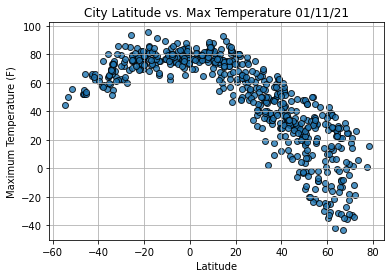

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Maximum Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig1.png")

# Show the plot
plt.show()

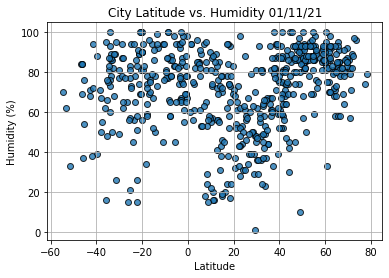

In [18]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig2.png")

# Show the plot
plt.show()

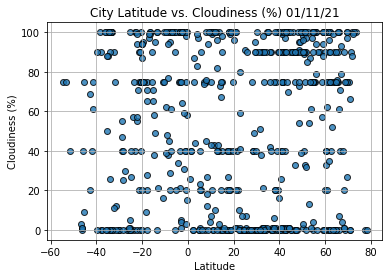

In [19]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig3.png")

# Show the plot
plt.show()

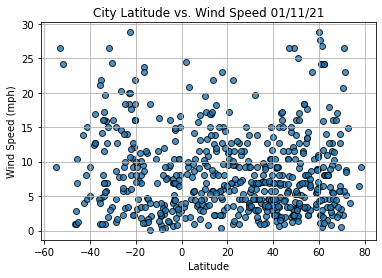

In [20]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("weather_data/Fig4.png")

# Show the plot
plt.show()

In [47]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data and plot a regression line 
# and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [48]:
index13 = city_data_df.loc[13]
index13

City                      Mataura
Country                        NZ
Date          2021-01-11 20:06:38
Lat                      -46.1927
Lng                       168.864
Max Temp                       52
Humidity                       84
Cloudiness                      1
Wind Speed                   1.01
Name: 13, dtype: object

In [49]:
# Filter the DF for all Northern Hemisphere latitudes >= 0
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
586    False
587    False
588     True
589    False
590     True
Name: Lat, Length: 591, dtype: bool

In [50]:
# Create a DF that returns data acquired in previous two cells
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Barrow,US,2021-01-11 20:06:37,71.2906,-156.7887,1.40,71,90,23.02
2,Adrar,MR,2021-01-11 20:06:37,20.5022,-10.0711,60.66,32,100,11.32
3,Hofn,IS,2021-01-11 20:06:37,64.2539,-15.2082,24.80,58,0,4.61
6,Yellowknife,CA,2021-01-11 20:06:37,62.4560,-114.3525,12.99,92,40,8.05
8,Ponta Do Sol,PT,2021-01-11 20:06:38,32.6667,-17.1000,55.00,63,21,3.00


In [51]:
# Create Northern and Southern Hemisphere DFs
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

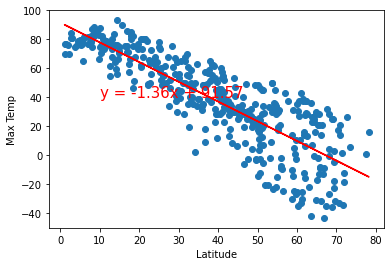

In [52]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

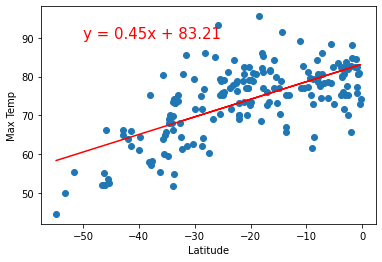

In [53]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

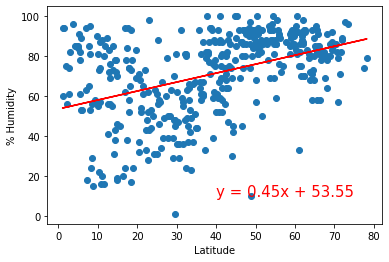

In [54]:
# Linear regression on percent humidity for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Humidity', '% Humidity', (40, 10))

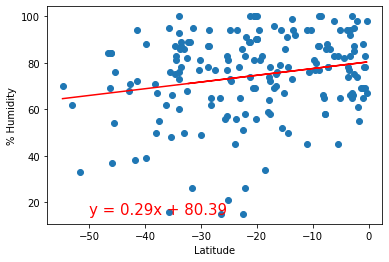

In [46]:
# Linear regression on percent humidity for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Humidity', '% Humidity', (-50, 15))

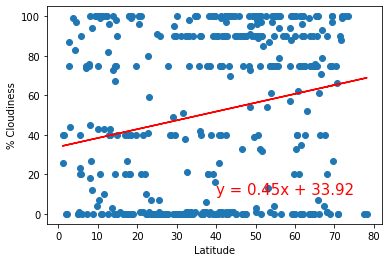

In [55]:
# Linear regression on percent cloudiness for the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (40, 10))

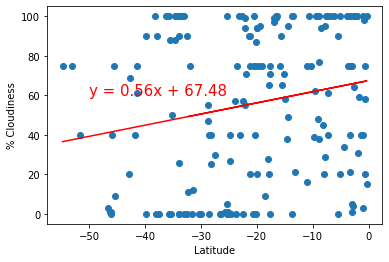

In [56]:
# Linear regression on percent cloudiness for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for % Cloudiness', '% Cloudiness', (-50, 60))

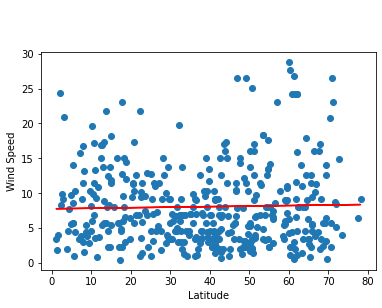

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

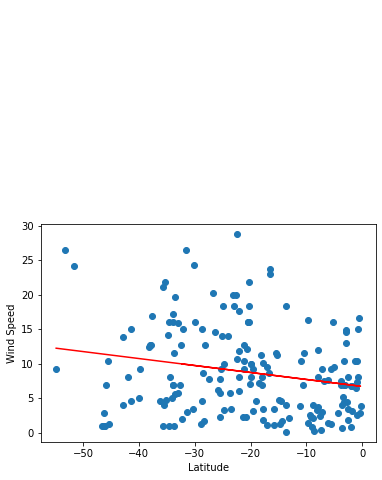

In [60]:
# Linear regression on wind speed for the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \
                      for Wind Speed', 'Wind Speed', (-50, 60))

# Unknown why titles are not printing on linear regression graphs or why line equation did not print on last 
# two graphs...